**<center>* Assignment 5: MULTI LINEAR REGRESSION *</center>**

DATASCIENCE

name: GUVVALA SOMASEKHAR REDDY

mail: showmove5697@gmail.com

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

#**Question-1)**
**Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.**

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

#Solution:

In [ ]:
# Data loading
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
statups50=pd.read_csv('50_Startups.csv')
statups50

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Basic and EDA 

In [ ]:
#renaming columns
statups50.rename(columns={'R&D Spend':'rd_spend','Administration':'administration', 'Marketing Spend':'market_spend','State':'state','Profit':'profit'},inplace=True)
statups50.columns

Index(['rd_spend', 'administration', 'market_spend', 'state', 'profit'], dtype='object')

In [ ]:
statups50.describe()

,rd_spend,administration,market_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
statups50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rd_spend        50 non-null     float64
 1   administration  50 non-null     float64
 2   market_spend    50 non-null     float64
 3   state           50 non-null     object 
 4   profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
statups50.isna().sum()

rd_spend          0
administration    0
market_spend      0
state             0
profit            0
dtype: int64

In [ ]:
statups50.duplicated().value_counts()

False    50
dtype: int64

##Visualising datapoints

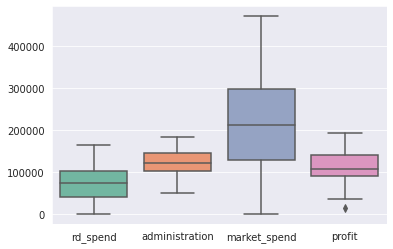

In [ ]:
#plotting boxplots to observe datapoints nature
sns.boxplot(data=statups50, orient="v", palette="Set2")

obsevation: 

There are outliers in profit, anyway; it is our dependent variable that we are going to predict.

There are no outliers in the remaining features.

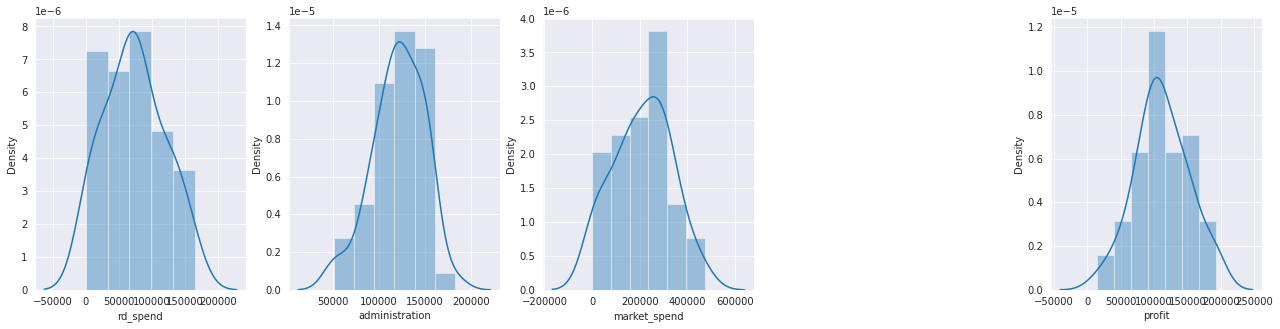

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,5))
for i, column in enumerate(statups50.columns, 1):
    if i == 4:
      continue
    plt.subplot(1,5,i)
    sns.distplot(statups50[column])

observation: All are normally distributed(appproximately).

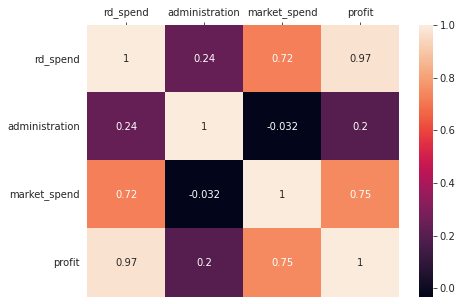

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(7,5))
ax = sns.heatmap(statups50.corr(), annot=True)
ax.xaxis.tick_top()

observation: Spend features are having great correlation with profit.

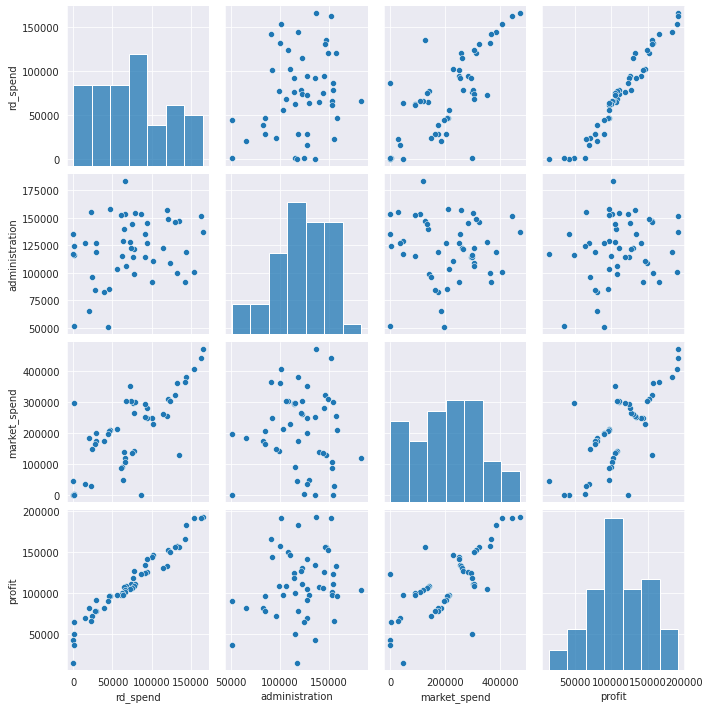

In [ ]:
#pairplot
sns.set_style(style='darkgrid')
sns.pairplot(statups50)

## Modelling

In [ ]:
# model 1 vs all
import statsmodels.formula.api as smf 
statups50_model1 = smf.ols('profit~rd_spend+administration+market_spend',data=statups50).fit()

In [ ]:
statups50_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        19:17:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
market_spend       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

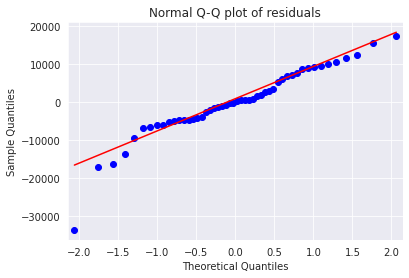

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(statups50_model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

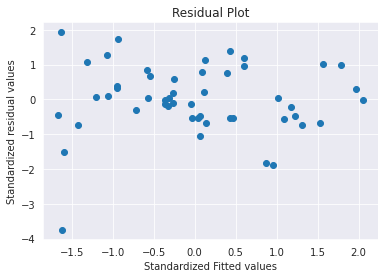

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(statups50_model1.fittedvalues),
            get_standardized_values(statups50_model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

##Residual vs Regressors - statsup50_model

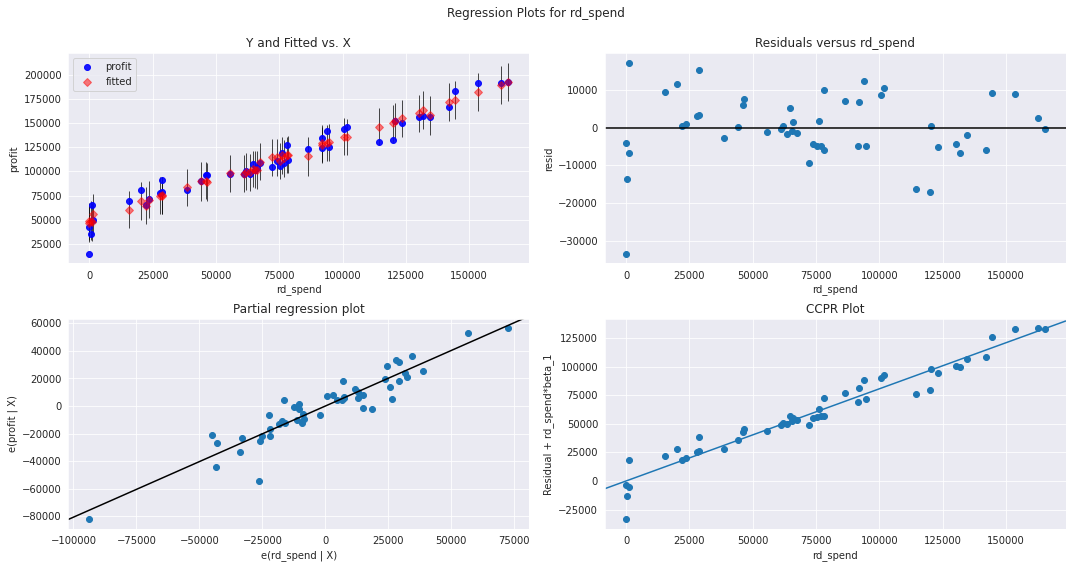

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statups50_model1, "rd_spend", fig=fig)
plt.show()

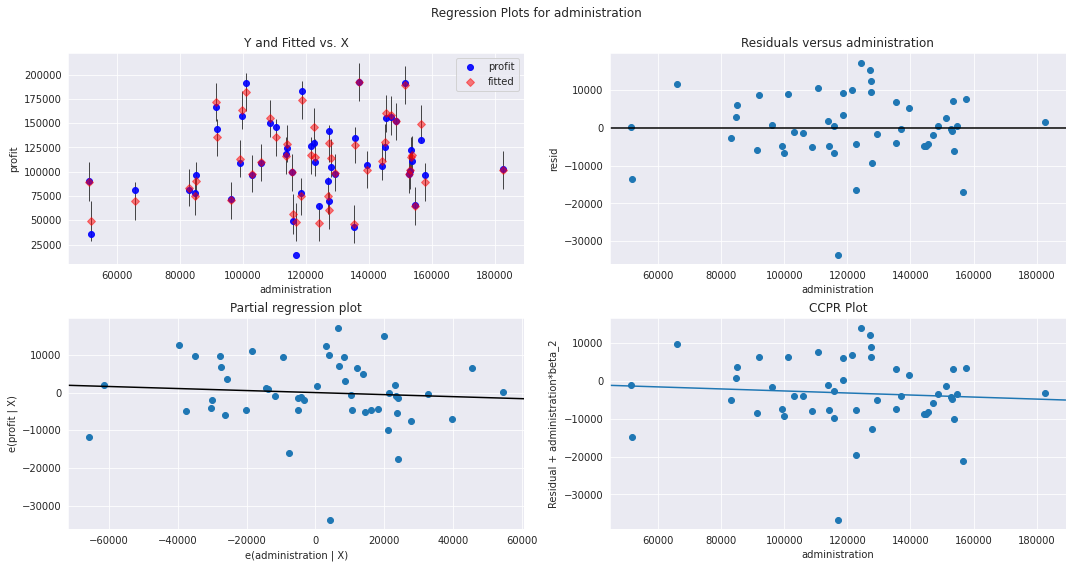

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statups50_model1, "administration", fig=fig)
plt.show()

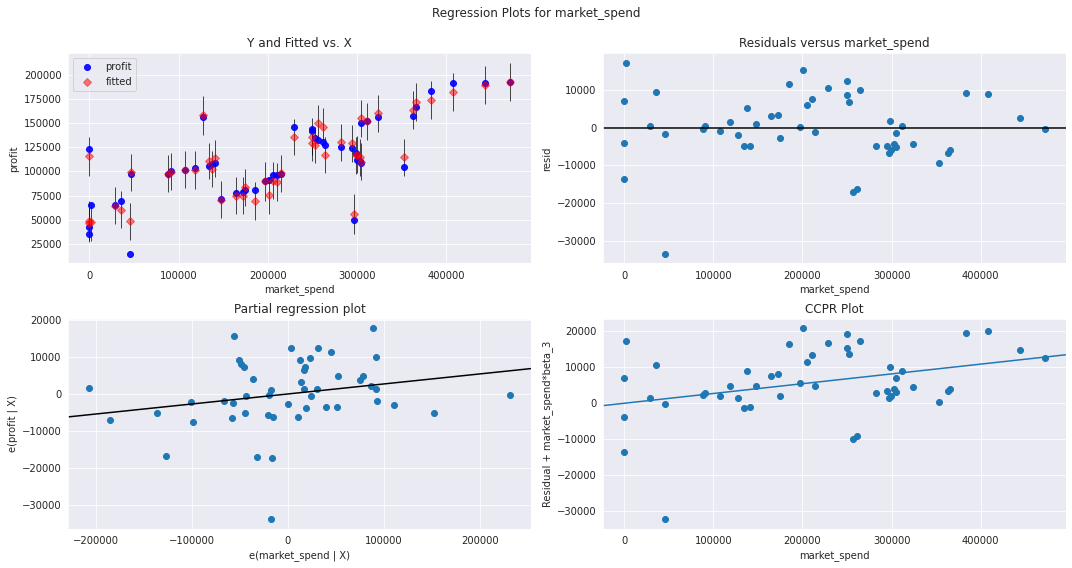

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statups50_model1, "market_spend", fig=fig)
plt.show()

### Linear Regression models

In [ ]:
statups50_model2 = smf.ols('profit~rd_spend',data=statups50).fit()
statups50_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           3.50e-32
Time:                        19:17:16   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

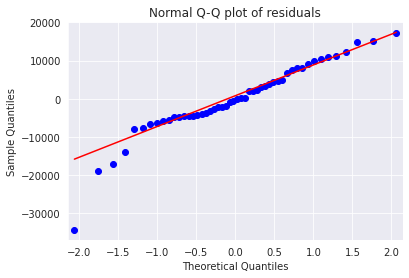

In [ ]:
import statsmodels.api as sm
qqplot2=sm.qqplot(statups50_model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

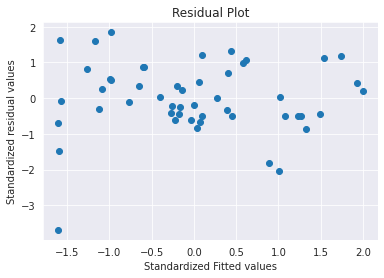

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(statups50_model2.fittedvalues),
            get_standardized_values(statups50_model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
statups50_model3 = smf.ols('profit~market_spend',data=statups50).fit()
statups50_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           4.38e-10
Time:                        19:17:17   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept         6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
market_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

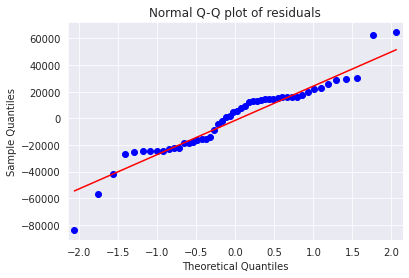

In [ ]:
import statsmodels.api as sm
qqplot3=sm.qqplot(statups50_model3.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

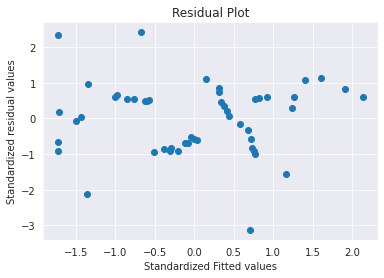

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(statups50_model3.fittedvalues),
            get_standardized_values(statups50_model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
statups50_model4 = smf.ols('profit~rd_spend+market_spend',data=statups50).fit()
statups50_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        19:17:18   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rd_spend         0.7966      0.041     19.266      0.000       0.713       0.880
market_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

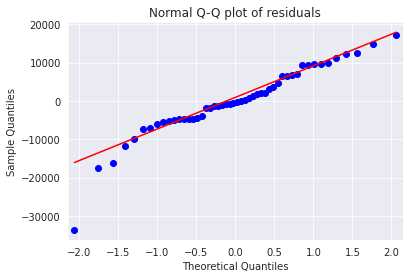

In [ ]:
import statsmodels.api as sm
qqplot4=sm.qqplot(statups50_model4.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

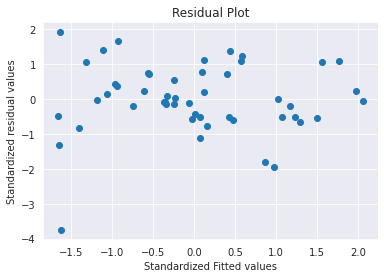

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(statups50_model4.fittedvalues),
            get_standardized_values(statups50_model4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
statups50_model5 = smf.ols('profit~rd_spend+administration',data=statups50).fit()
statups50_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           7.29e-31
Time:                        19:17:19   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
rd_spend           0.8621      0.030     28.589      0.000       0.801       0.923
administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

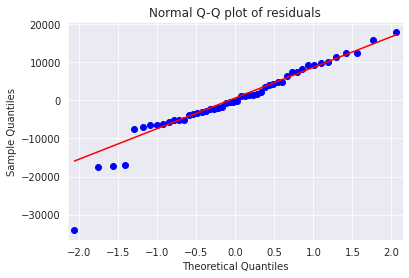

In [ ]:
import statsmodels.api as sm
qqplot5=sm.qqplot(statups50_model5.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

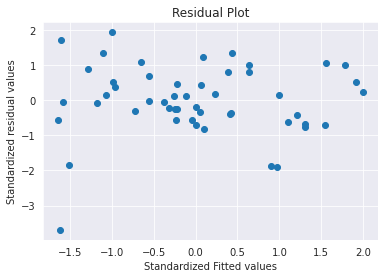

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(statups50_model5.fittedvalues),
            get_standardized_values(statups50_model5.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

## Resudue vs regressors statsup50_model5

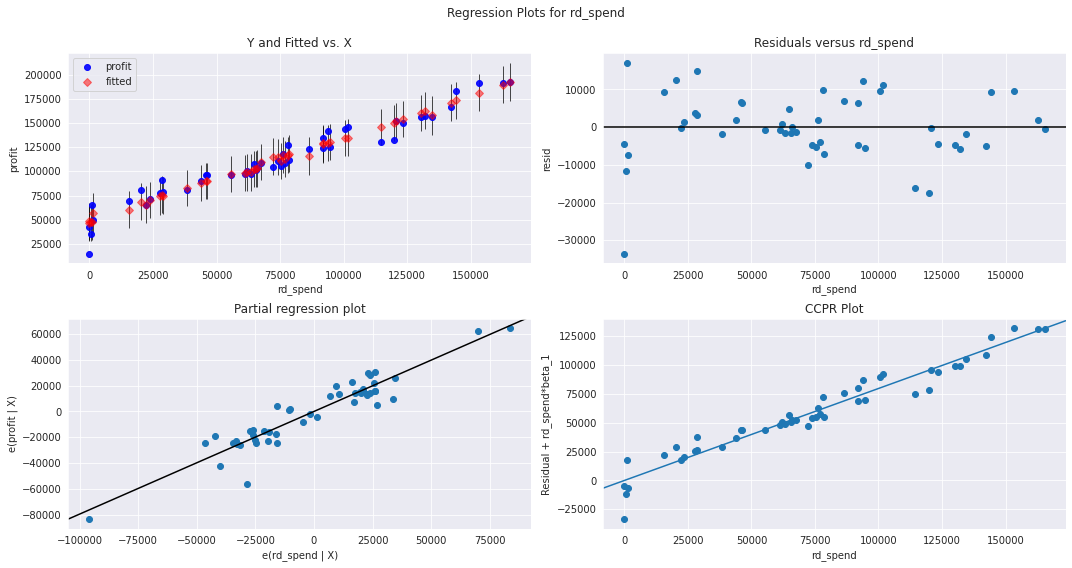

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statups50_model4, "rd_spend", fig=fig)
plt.show()

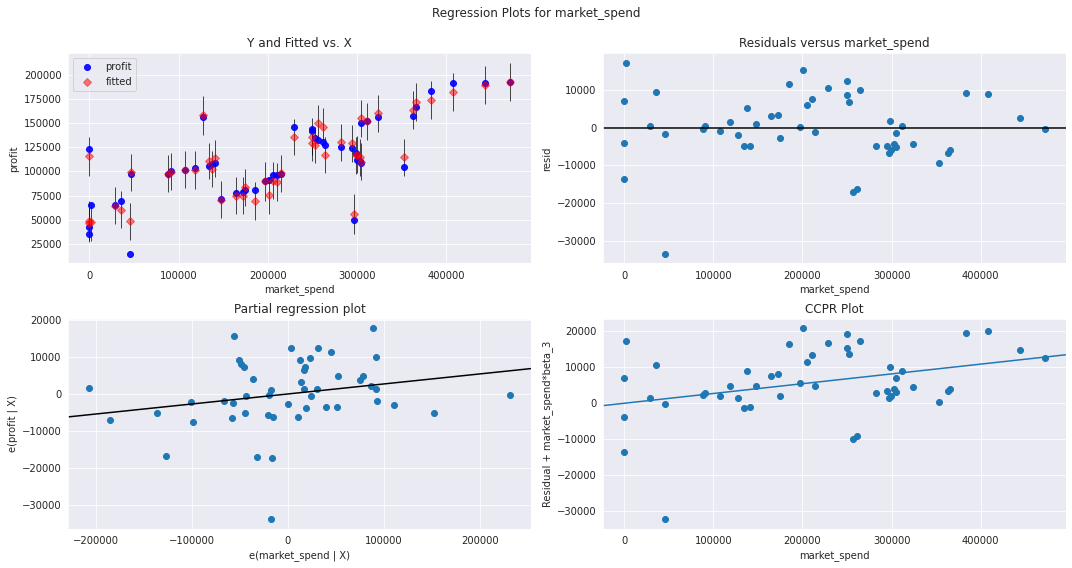

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statups50_model1, "market_spend", fig=fig)
plt.show()

##Variance Inflation Factor

In [ ]:
statups50.columns

Index(['rd_spend', 'administration', 'market_spend', 'state', 'profit'], dtype='object')

In [ ]:
aic_rd_spend=smf.ols('rd_spend~market_spend+administration',data=statups50).fit().aic
rsq_rd_spend = smf.ols('rd_spend~market_spend+administration',data=statups50).fit().rsquared  
vif_rd_spend = 1/(1-rsq_rd_spend)

aic_administration=smf.ols('administration~market_spend+rd_spend',data=statups50).fit().aic
rsq_administration = smf.ols('administration~market_spend+rd_spend',data=statups50).fit().rsquared  
vif_administration = 1/(1-rsq_administration) 

aic_market_spend=smf.ols('market_spend~rd_spend+administration',data=statups50).fit().aic
rsq_market_spend = smf.ols('market_spend~rd_spend+administration',data=statups50).fit().rsquared  
vif_market_spend = 1/(1-rsq_market_spend) 


# Storing vif values in a data frame
df = {'Variables':['rd_spend','administration','market_spend'],
      'VIF':[vif_rd_spend,vif_administration,vif_market_spend],
      'aic':[aic_rd_spend,aic_administration,aic_market_spend],
      'r_sqr':[rsq_rd_spend,rsq_administration,rsq_market_spend]}
Vif_tab = pd.DataFrame(df)  
Vif_tab

,Variables,VIF,aic,r_sqr
0,rd_spend,2.468903,1175.121976,0.594962
1,administration,1.175091,1162.875978,0.149002
2,market_spend,2.326773,1276.074905,0.570220


In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = statups50_model1.get_influence()
(c, _) = model_influence.cooks_distance

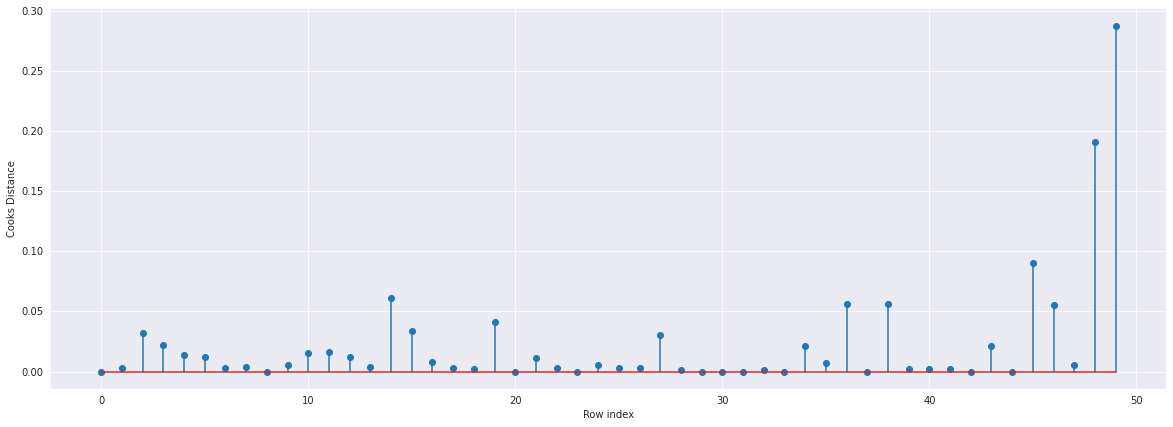

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(statups50)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [ ]:
k,n=statups50.shape 
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

30.599999999999998

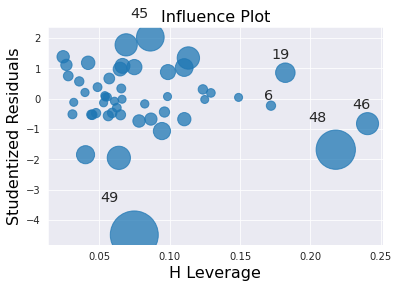

In [ ]:
#from seaborn.regression import statsmodels
#from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import statsmodels.api as sm

#influence_plot(model1,alhpa=0.5)
sm.graphics.influence_plot(statups50_model1)
plt.show()

From the above plot, it is evident that data point 48 and 49 are the influencers

In [ ]:
statups50[statups50.index.isin([48, 46,49])]

,rd_spend,administration,market_spend,state,profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
statups50_1=statups50.drop(statups50.index[[48,46,49]],axis=0).reset_index()
statups50_1=statups50_1.drop('index',axis=1)
statups50_1

,rd_spend,administration,market_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Final model

In [ ]:
statsup50_1_model = smf.ols('profit~rd_spend+market_spend',data=statups50_1).fit()
statsup50_1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.65e-31
Time:                        19:17:24   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
rd_spend         0.7439      0.037     19.902      0.000       0.669       0.819
market_spend     0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
(statsup50_1_model.rsquared,statsup50_1_model.aic)

(0.9601156240945742, 972.8030903954614)

In [ ]:
model_influence_x = statsup50_1_model.get_influence()
(c1, _) = model_influence_x.cooks_distance

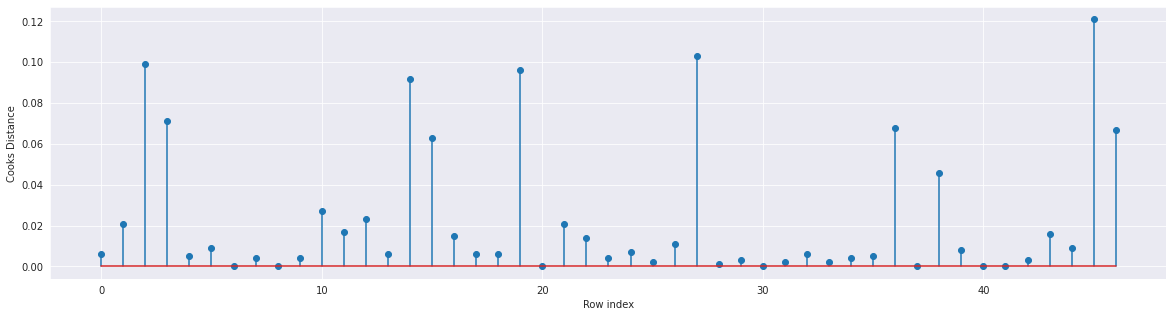

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 5))
plt.stem(np.arange(len(statups50_1)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c1),np.max(c1))

(45, 0.12080904032647966)

In [ ]:
#New data for prediction
predict_data=pd.DataFrame({'rd_spend':100000,"market_spend":250000},index=[1])
predict_data

,rd_spend,market_spend
1,100000,250000


In [ ]:
statsup50_1_model.predict(predict_data)

1    134173.457814
dtype: float64

In [ ]:
predicted_values = statsup50_1_model.predict(statups50_1)
statups50_1["predicted_profits"] = pd.Series(predicted_values)
statups50_1

,rd_spend,administration,market_spend,state,profit,predicted_profits
0,165349.20,136897.80,471784.10,New York,192261.83,189947.201324
1,162597.70,151377.59,443898.53,California,191792.06,186999.822978
2,153441.51,101145.55,407934.54,Florida,191050.39,179027.346980
3,144372.41,118671.85,383199.62,New York,182901.99,171482.332145
4,142107.34,91391.77,366168.42,Florida,166187.94,169247.365053
5,131876.90,99814.71,362861.36,New York,156991.12,161530.559248
6,134615.46,147198.87,127716.82,California,156122.51,155972.916982
7,130298.13,145530.06,323876.68,Florida,155752.60,159097.044290
8,120542.52,148718.95,311613.29,New York,152211.77,151444.171338
9,123334.88,108679.17,304981.62,California,149759.96,153307.099523


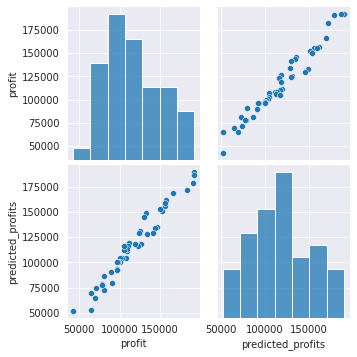

In [ ]:
sns.pairplot(statups50_1[['profit','predicted_profits']]) 

In [ ]:
statsup50_1_model.rsquared,statsup50_1_model.rsquared_adj

(0.9601156240945742, 0.9583026979170548)

#Conclusion:

In [ ]:
# comparing above models
test_data={'Model':pd.Series(['all linearModel Transformation','rd_spend','market_spend',
                              'rd_spend+market_spend','rd_spend+administration','After Removing influceing points']),
     'R Squared':pd.Series([statups50_model1.rsquared,statups50_model2.rsquared,statups50_model3.rsquared,
                            statups50_model4.rsquared,statups50_model1.rsquared,statsup50_1_model.rsquared]),
     'adjR Squared':pd.Series([statups50_model1.rsquared_adj,statups50_model2.rsquared_adj,statups50_model3.rsquared_adj,
                            statups50_model4.rsquared_adj,statups50_model1.rsquared_adj,statsup50_1_model.rsquared_adj])}
     
test_table=pd.DataFrame(test_data)
test_table

,Model,R Squared,adjR Squared
0,all linearModel Transformation,0.950746,0.947534
1,rd_spend,0.946535,0.945421
2,market_spend,0.559154,0.549969
3,rd_spend+market_spend,0.950450,0.948342
4,rd_spend+administration,0.950746,0.947534
5,After Removing influceing points,0.960116,0.958303


The Final model giving best accuracy among all for predicting profit.
 i,e.**96%**

#Question-2)

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[C("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


Model -- model of the car,
Price  -- Offer Price in EUROs,

Age_08_04 -- Age in months as in August 2004,	
Mfg_Month -- Manufacturing month (1-12),

Mfg_Year	-- Manufacturing Year,
KM -- Accumulated Kilometers on odometer,

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG),
HP -- Horse Power,

Met_Color	 -- Metallic Color?  (Yes=1, No=0),Color -- Color (Blue, Red, Grey, Silver, Black, etc.),

Automatic	-- Automatic ( (Yes=1, No=0),
cc -- Cylinder Volume in cubic centimeters,

Doors -- Number of doors,
Cylinders	-- Number of cylinders,

Gears -- Number of gear positions,
Quarterly_Tax -- Quarterly road tax in EUROs,

Weight -- Weight in Kilograms,
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0),

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0),Guarantee_Period -- 	Guarantee period in months,

ABS -- Anti-Lock Brake System (Yes=1, No=0),
Airbag_1 -- Driver_Airbag  (Yes=1, No=0),

Airbag_2 -- Passenger Airbag  (Yes=1, No=0),
Airco -- Airconditioning  (Yes=1, No=0),

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0),
Boardcomputer -- Boardcomputer  (Yes=1, No=0),

CD_Player -- CD Player  (Yes=1, No=0),
Central_Lock -- Central Lock  (Yes=1, No=0),

Powered_Windows -- Powered Windows  (Yes=1, No=0),
Power_Steering -- Power Steering  (Yes=1, No=0),

Radio -- Radio  (Yes=1, No=0),
Mistlamps	-- Mistlamps  (Yes=1, No=0),

Sport_Model -- Sport Model  (Yes=1, No=0),
Backseat_Divider -- Backseat Divider  (Yes=1, No=0),

Metallic_Rim --Metallic Rim  (Yes=1, No=0),
Radio_cassette -- Radio Cassette  (Yes=1, No=0),

Tow_Bar -- Tow Bar  (Yes=1, No=0)

#Solution:

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (1).csv


In [ ]:
toyotocorolla=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
toyotocorolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## Basic and EDA 

In [ ]:
toyotocorolla.shape

(1436, 38)

In [ ]:
toyotocorolla.rename(columns={'Price':'price','Age_08_04':'age', 'KM':'km', 'HP':'hp',
                              'Doors':'doors','Gears':'gears','Quarterly_Tax':'qtr_tax','Weight':'weight'}, inplace = True)
toyotocorolla_1 = toyotocorolla[["price","age","km","hp","cc","doors","gears","qtr_tax","weight"]]
toyotocorolla_1

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyotocorolla_1.duplicated().value_counts()

False    1435
True        1
dtype: int64

In [ ]:
toyotocorolla_1[toyotocorolla_1.duplicated()]

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyotocorolla_1.drop_duplicates(inplace = True)
toyotocorolla_1.reset_index()
toyotocorolla_1.shape

(1435, 9)

In [ ]:
toyotocorolla_1.duplicated().value_counts()

False    1435
dtype: int64

In [ ]:
toyotocorolla_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    1435 non-null   int64
 1   age      1435 non-null   int64
 2   km       1435 non-null   int64
 3   hp       1435 non-null   int64
 4   cc       1435 non-null   int64
 5   doors    1435 non-null   int64
 6   gears    1435 non-null   int64
 7   qtr_tax  1435 non-null   int64
 8   weight   1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [ ]:
toyotocorolla_1.describe()

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [ ]:
for i, column in enumerate(toyotocorolla_1.columns, 1):
  print(toyotocorolla_1[column].value_counts())

8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: price, Length: 236, dtype: int64
68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: age, Length: 77, dtype: int64
36000    9
1        8
59000    7
43000    7
45000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: km, Length: 1263, dtype: int64
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
Name: hp, dtype: int64
1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64
5    673
3    622
4    138
2      2
Name: doors, dtype: int64
5    1389
6      43
3       2
4       1
Name: gears, dtype: int64
85     613
69     559
185     96
19      72
100   

In [ ]:
toyotocorolla_1.head(3)

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


##Visualising datapoints

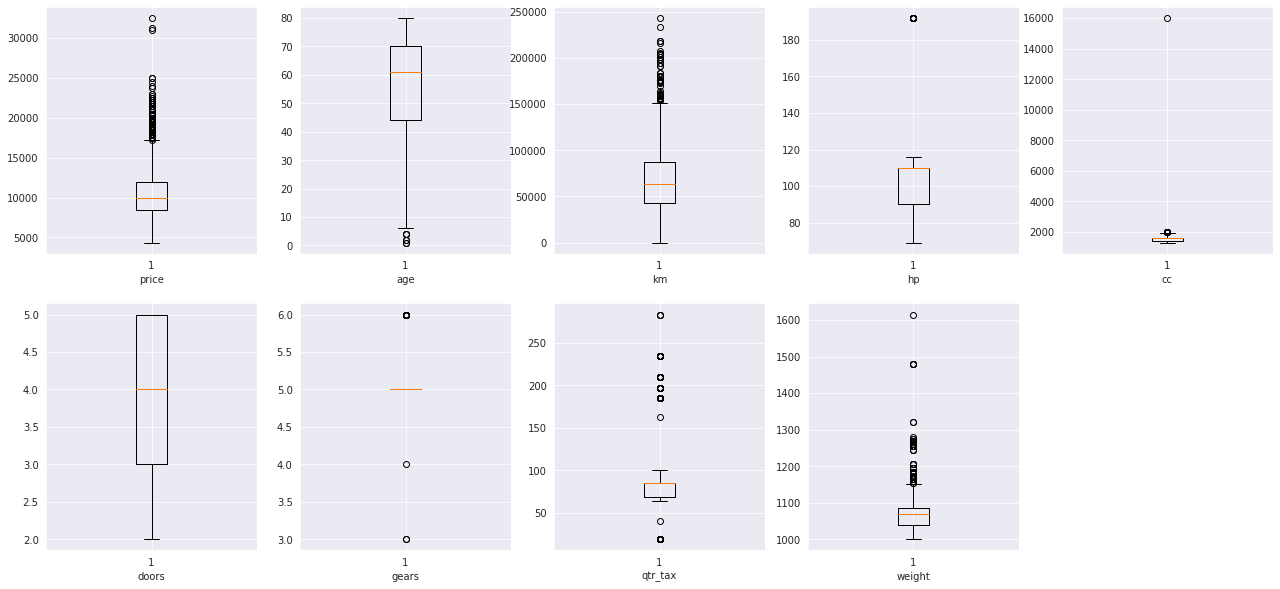

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(toyotocorolla_1.columns, 1):
    plt.subplot(2,5,i)
    plt.boxplot(toyotocorolla_1[column])
    plt.xlabel(toyotocorolla_1[column].name)

obsevation:There are outliers in almost all features.

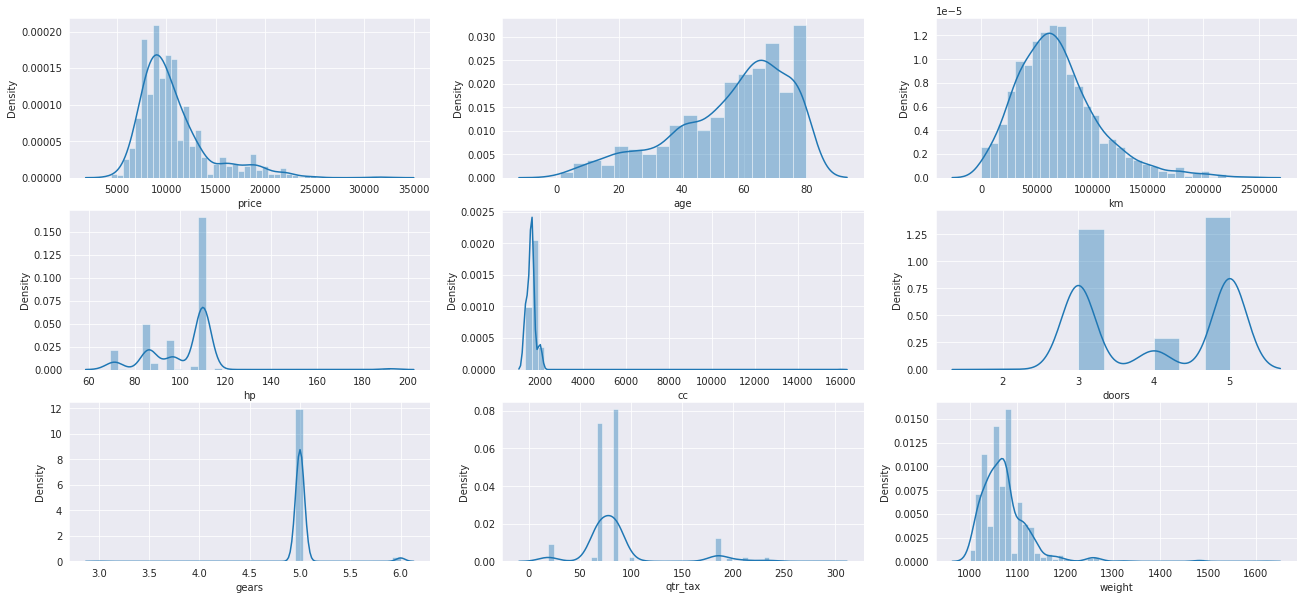

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(toyotocorolla_1.columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(toyotocorolla_1[column])

observation: all are tailed distributions

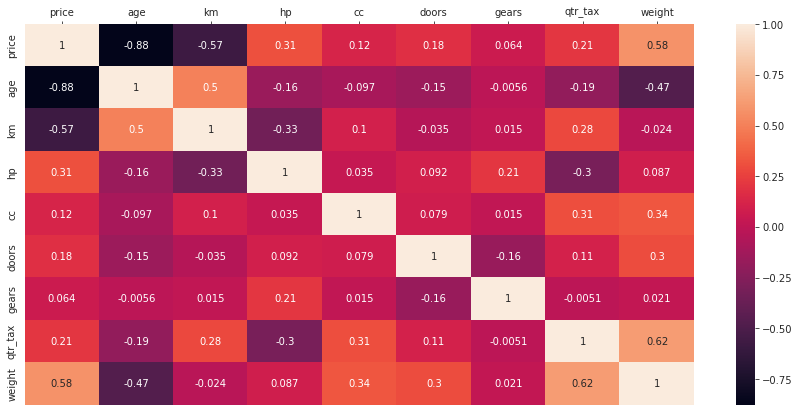

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,7))
ax = sns.heatmap(toyotocorolla_1.corr(), annot=True)
ax.xaxis.tick_top()

obsevation : price has more correlation with age,weight,km than rest features.

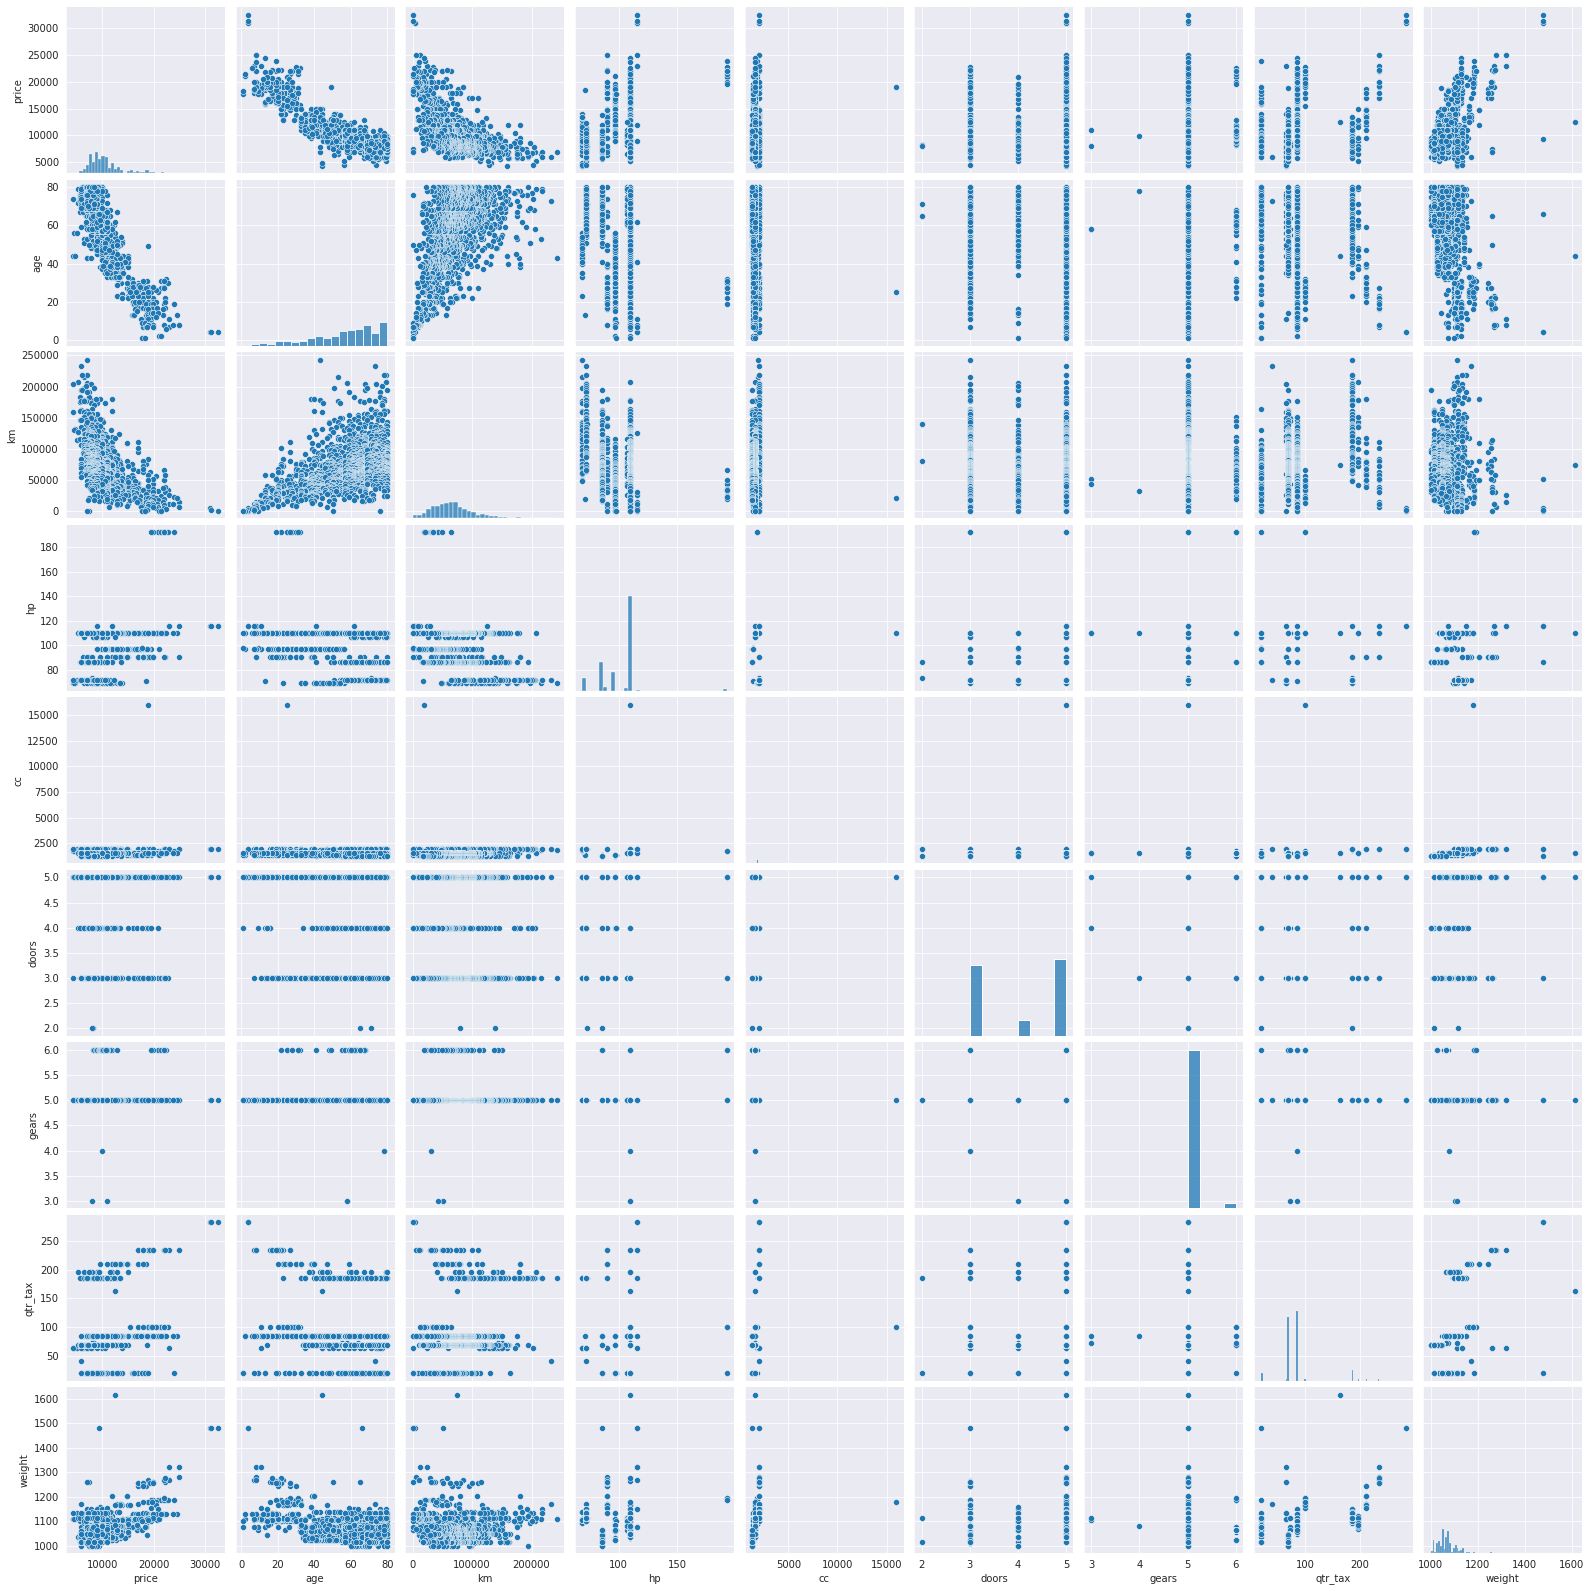

In [ ]:
#pairplot
sns.set_style(style='darkgrid')
sns.pairplot(toyotocorolla_1)

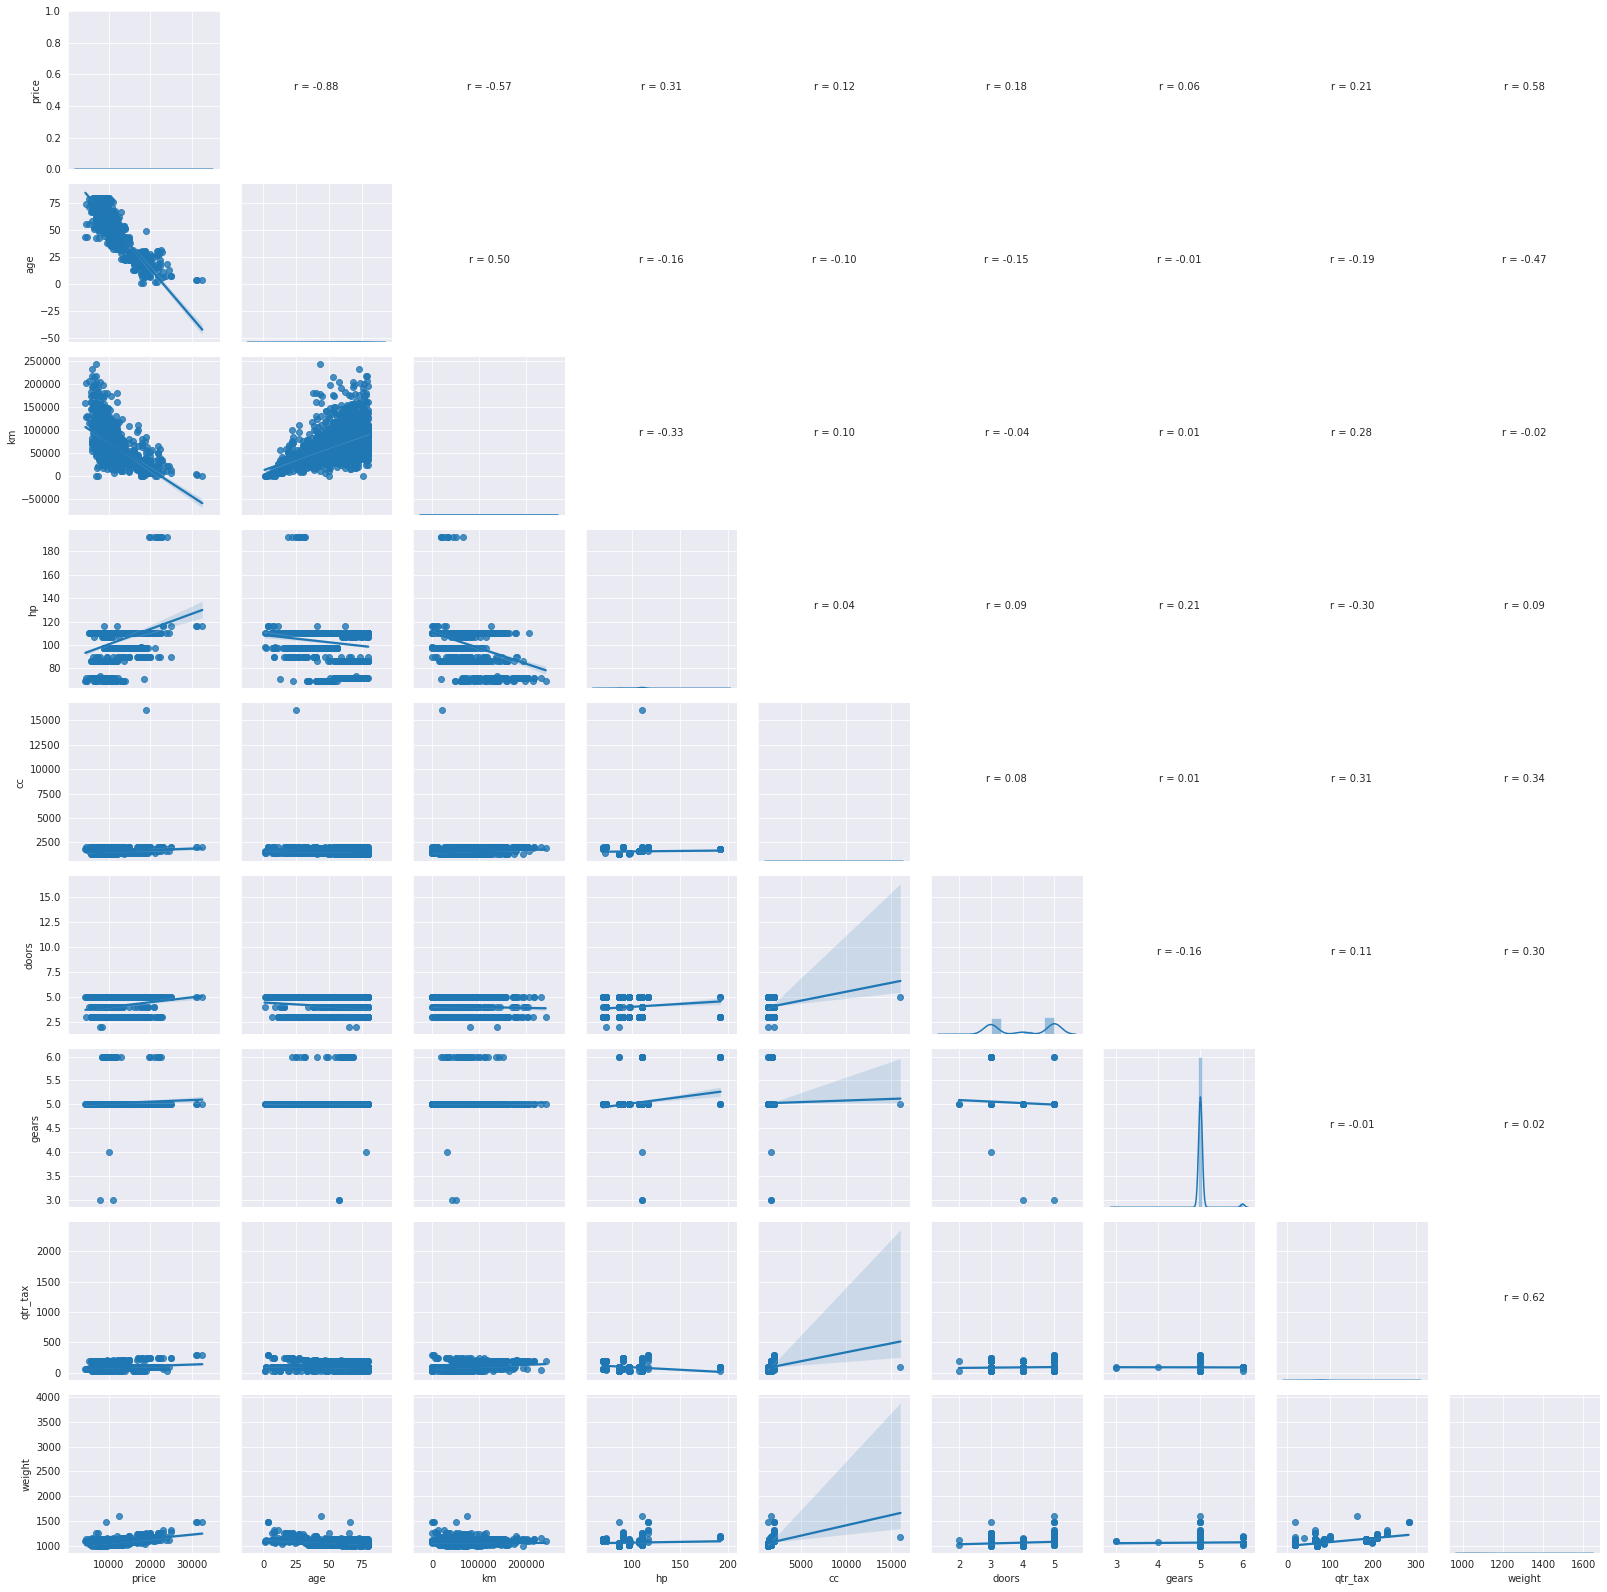

In [ ]:
# create  pairGrid with correlation coefficients
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()


g = sns.PairGrid(toyotocorolla_1)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

## Modelling

In [ ]:
import statsmodels.formula.api as smf 
model= smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:20:34   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qtr_tax        3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

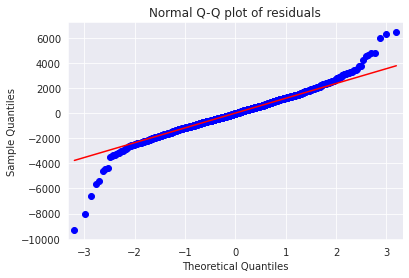

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

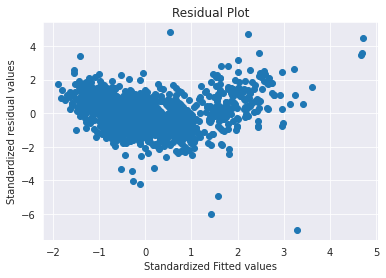

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

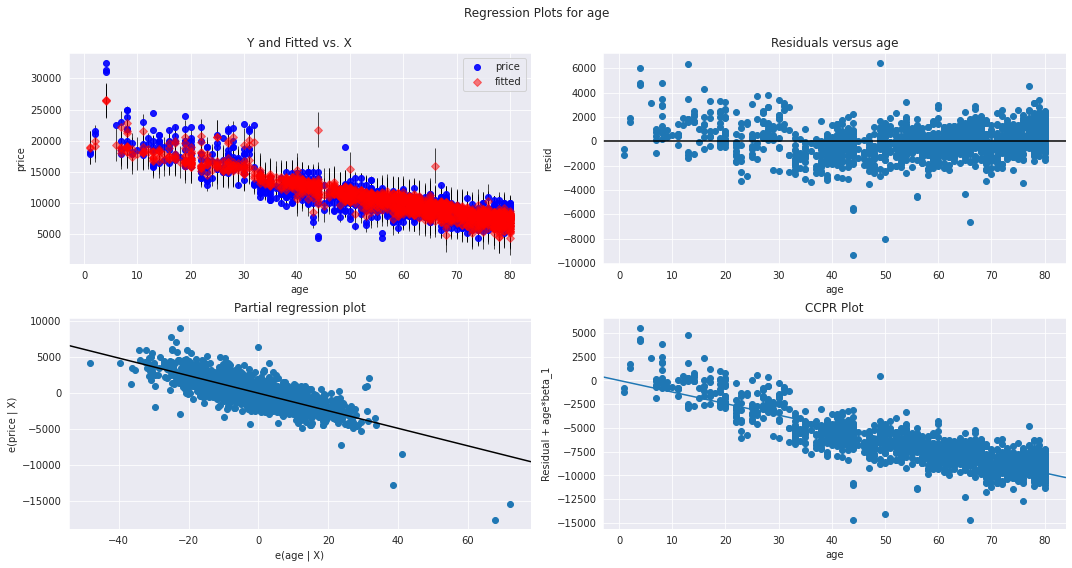

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

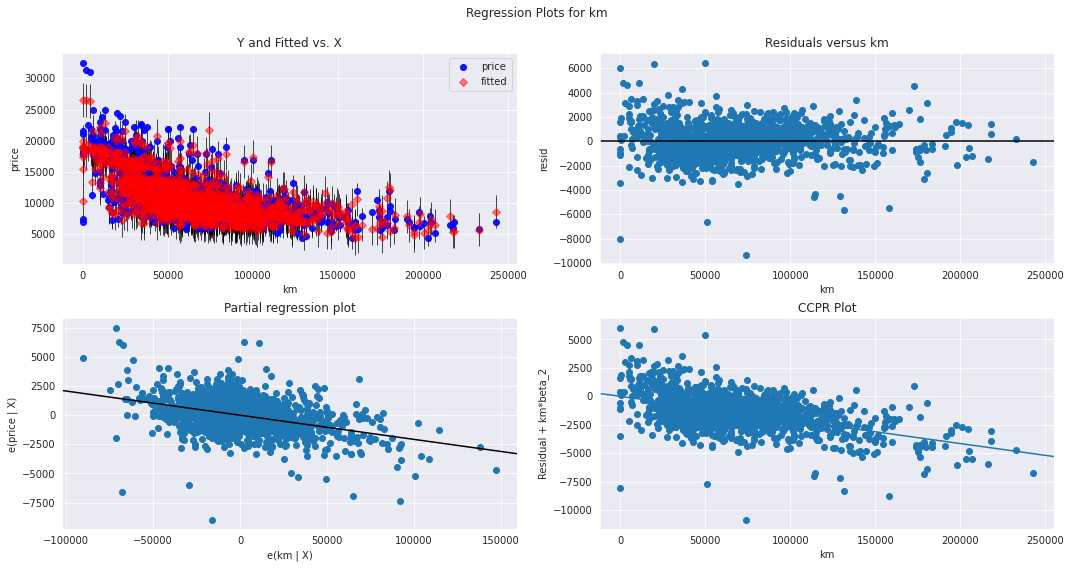

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "km", fig=fig)
plt.show()

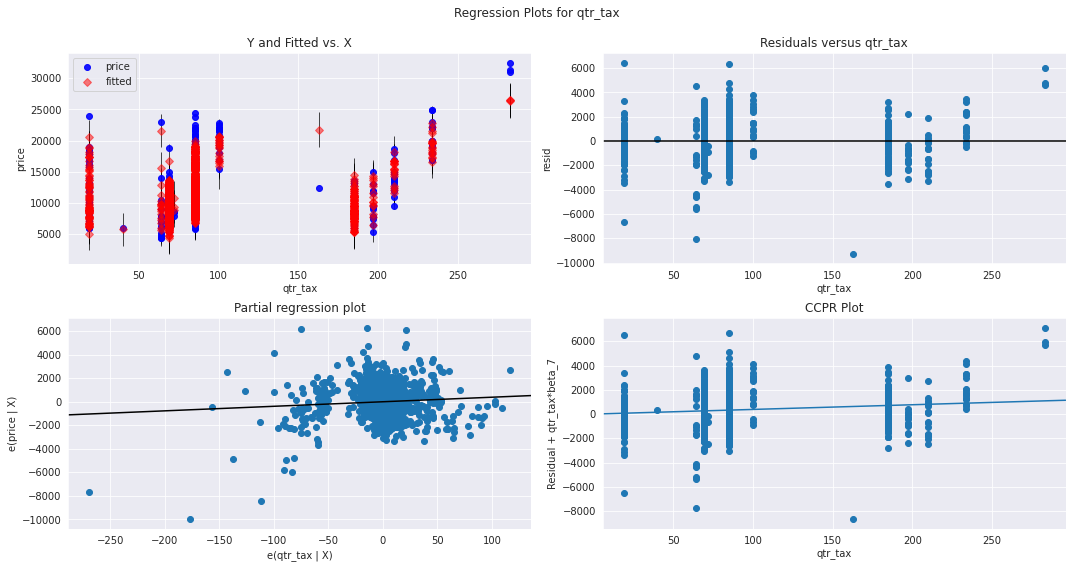

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "qtr_tax", fig=fig)
plt.show()

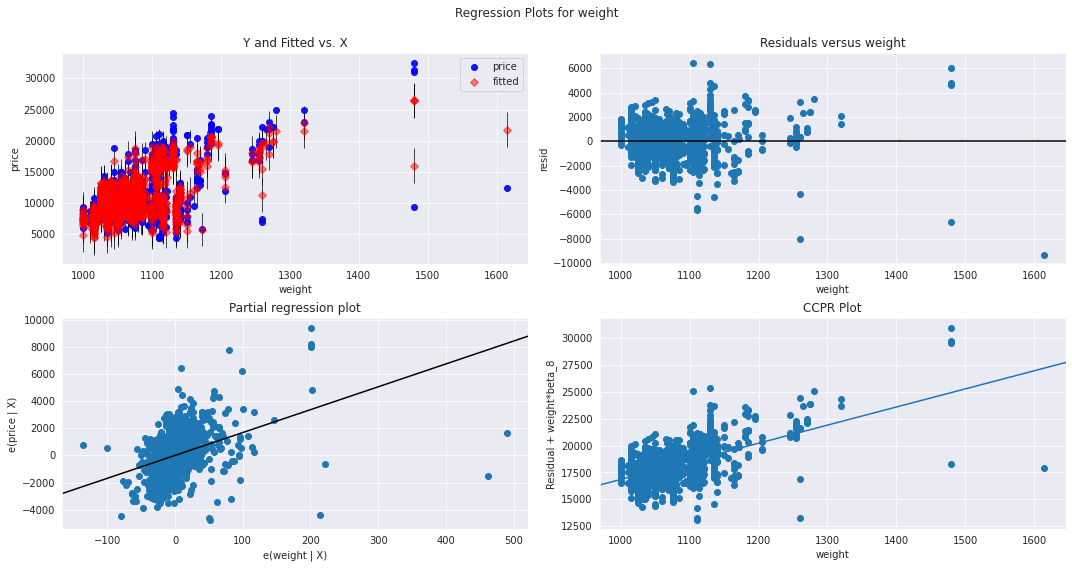

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "weight", fig=fig)
plt.show()

##Linear Regression Models 

In [ ]:
import statsmodels.formula.api as smf 
toyotocorolla_1_model2 = smf.ols('price~age',data=toyotocorolla_1).fit()
toyotocorolla_1_model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:20:42   Log-Likelihood:                -12742.
No. Observations:                1435   AIC:                         2.549e+04
Df Residuals:                    1433   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.026e+04    145.926    138.818      0.000       2e+04    2.05e+04
age         -170.3487      2.474    -68.847      0.000    -175.202    -165.495
==============================================================================
Omnibus:                      363.006   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.814
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       9.673   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

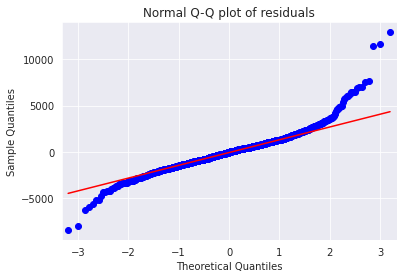

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(toyotocorolla_1_model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

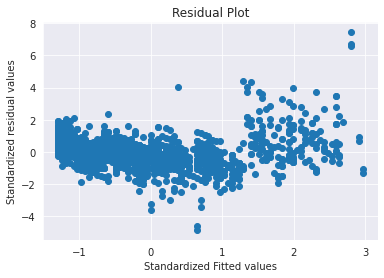

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(toyotocorolla_1_model2.fittedvalues),
            get_standardized_values(toyotocorolla_1_model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
import statsmodels.formula.api as smf 
toyotocorolla_1_model3 = smf.ols('price~km',data=toyotocorolla_1).fit()
toyotocorolla_1_model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     687.6
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          4.12e-124
Time:                        19:20:43   Log-Likelihood:                -13509.
No. Observations:                1435   AIC:                         2.702e+04
Df Residuals:                    1433   BIC:                         2.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04    163.344     88.643      0.000    1.42e+04    1.48e+04
km            -0.0548      0.002    -26.222      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.246   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.937
Skew:                           1.385   Prob(JB):                    6.44e-244
Kurtosis:                       6.325   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

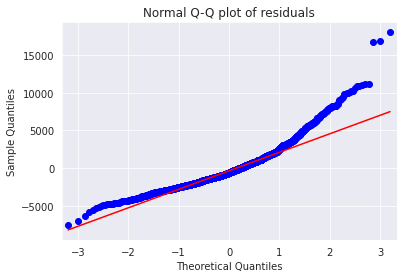

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(toyotocorolla_1_model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

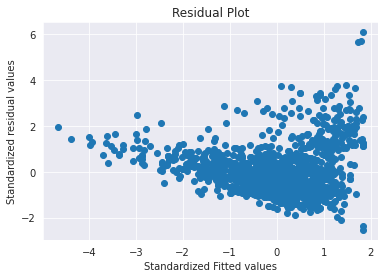

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(toyotocorolla_1_model3.fittedvalues),
            get_standardized_values(toyotocorolla_1_model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
import statsmodels.formula.api as smf 
toyotocorolla_1_model4 = smf.ols('price~hp',data=toyotocorolla_1).fit()
toyotocorolla_1_model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     156.9
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           3.12e-34
Time:                        19:20:44   Log-Likelihood:                -13715.
No. Observations:                1435   AIC:                         2.743e+04
Df Residuals:                    1433   BIC:                         2.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3041.1318    619.766      4.907      0.000    1825.386    4256.877
hp            75.6689      6.041     12.526      0.000      63.818      87.519
==============================================================================
Omnibus:                      447.247   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.705
Skew:                           1.586   Prob(JB):                    6.00e-288
Kurtosis:                       6.473   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

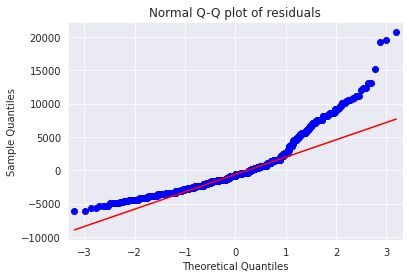

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(toyotocorolla_1_model4.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

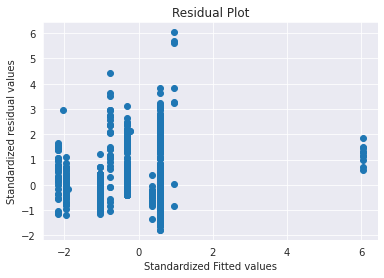

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(toyotocorolla_1_model4.fittedvalues),
            get_standardized_values(toyotocorolla_1_model4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
import statsmodels.formula.api as smf 
toyotocorolla_1_model5 = smf.ols('price~weight',data=toyotocorolla_1).fit()
toyotocorolla_1_model5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     711.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.55e-127
Time:                        19:20:44   Log-Likelihood:                -13501.
No. Observations:                1435   AIC:                         2.701e+04
Df Residuals:                    1433   BIC:                         2.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.193e+04   1601.273    -19.938      0.000   -3.51e+04   -2.88e+04
weight        39.7719      1.492     26.665      0.000      36.846      42.698
==============================================================================
Omnibus:                      104.356   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.888
Skew:                           0.046   Prob(JB):                    2.57e-112
Kurtosis:                       5.930   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

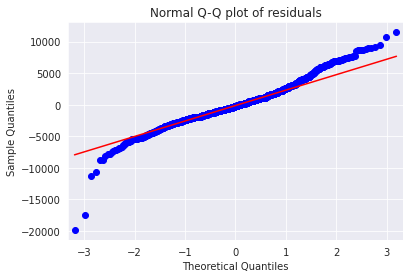

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(toyotocorolla_1_model5.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

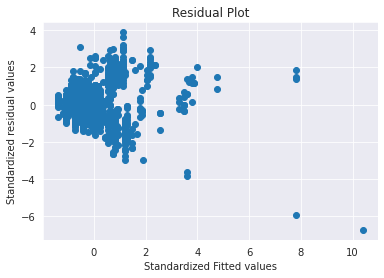

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(toyotocorolla_1_model5.fittedvalues),
            get_standardized_values(toyotocorolla_1_model5.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
import statsmodels.formula.api as smf 
toyotocorolla_1_model6 = smf.ols('price~age+km+weight+hp',data=toyotocorolla_1).fit()
toyotocorolla_1_model6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2206.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:20:45   Log-Likelihood:                -12376.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1430   BIC:                         2.479e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3858.7559    940.086     -4.105      0.000   -5702.852   -2014.660
age         -122.4705      2.622    -46.712      0.000    -127.613    -117.327
km            -0.0196      0.001    -16.217      0.000      -0.022      -0.017
weight        18.3840      0.807     22.776      0.000      16.801      19.967
hp            30.2027      2.538     11.901      0.000      25.224      35.181
==============================================================================
Omnibus:                      192.444   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1462.386
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       7.892   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Varience Inflation Factor

In [ ]:
aic_age=smf.ols('age~km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().aic
rsq_age = smf.ols('age~km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().rsquared  
vif_age = 1/(1-rsq_age)

aic_km=smf.ols('km~age+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().aic
rsq_km = smf.ols('km~age+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().rsquared  
vif_km = 1/(1-rsq_km) 

aic_hp=smf.ols('hp~age+km+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().aic
rsq_hp = smf.ols('hp~age+km+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

aic_cc=smf.ols('cc~age+km+hp+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().aic
rsq_cc = smf.ols('cc~age+km+hp+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

aic_doors=smf.ols('doors~age+km+cc+hp+gears+qtr_tax+weight',data=toyotocorolla_1).fit().aic
rsq_doors = smf.ols('doors~age+km+cc+hp+gears+qtr_tax+weight',data=toyotocorolla_1).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

aic_qtr_tax=smf.ols('qtr_tax~age+km+cc+doors+gears+hp+weight',data=toyotocorolla_1).fit().aic
rsq_qtr_tax = smf.ols('qtr_tax~age+km+cc+doors+gears+hp+weight',data=toyotocorolla_1).fit().rsquared  
vif_qtr_tax = 1/(1-rsq_qtr_tax)

aic_weight=smf.ols('weight~age+km+cc+doors+gears+qtr_tax+hp',data=toyotocorolla_1).fit().aic
rsq_weight = smf.ols('weight~age+km+cc+doors+gears+qtr_tax+hp',data=toyotocorolla_1).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

# Storing vif values in a data frame
df = {'Variables':['age','km','hp','cc','doors','qtr_tax','weight'],
      'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_qtr_tax,vif_weight],
      'aic':[aic_age,aic_km,aic_hp,aic_cc,aic_doors,aic_qtr_tax,aic_weight],
      'r_sqr':[rsq_age,rsq_km,rsq_hp,rsq_cc,rsq_doors,rsq_qtr_tax,rsq_weight]}
Vif_tab = pd.DataFrame(df)  
Vif_tab

,Variables,VIF,aic,r_sqr
0,age,1.876236,11568.161431,0.467018
1,km,1.757178,33504.865129,0.430906
2,hp,1.419180,11353.533979,0.295368
3,cc,1.163470,21235.440839,0.140502
4,doors,1.155890,3740.296995,0.134866
5,qtr_tax,2.295375,13550.139079,0.564341
6,weight,2.487180,14133.791531,0.597938


##Model Deletion Diagnostics

In [ ]:
toyotocorolla_1_model1 = smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_1).fit()
toyotocorolla_1_model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:20:45   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qtr_tax        3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

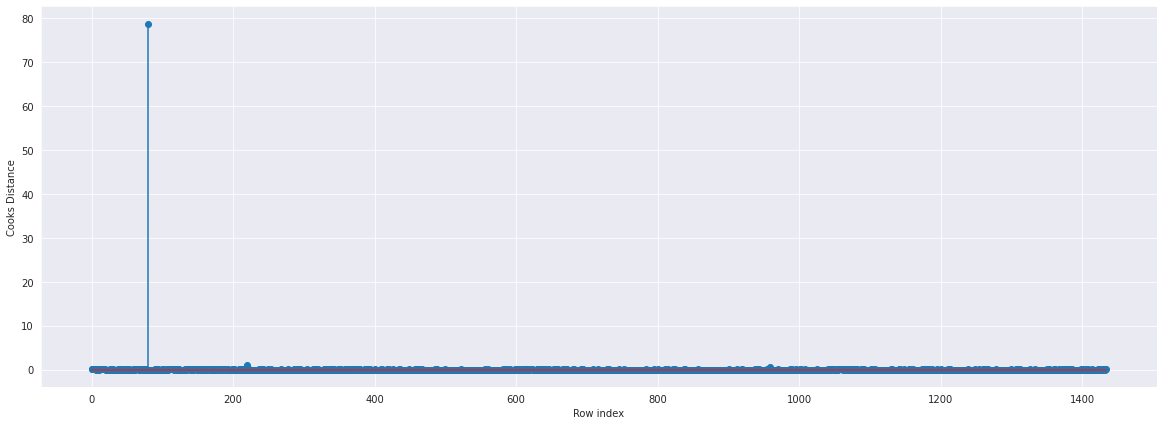

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyotocorolla_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582258927)

In [ ]:
n,k=toyotocorolla_1.shape 
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

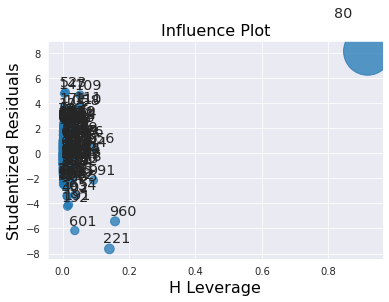

In [ ]:
#from seaborn.regression import statsmodels
#from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import statsmodels.api as sm

#influence_plot(model1,alhpa=0.5)
sm.graphics.influence_plot(toyotocorolla_1_model1)
plt.show()

In [ ]:
toyotocorolla_1[toyotocorolla_1.index.isin([80])]

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyotocorolla_2=toyotocorolla_1.drop(toyotocorolla_1.index[[80]],axis=0).reset_index()
toyotocorolla_2=toyotocorolla_2.drop('index',axis=1)
toyotocorolla_2 

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model= smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_2).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyotocorolla_2=toyotocorolla_2.drop(toyotocorolla_2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyotocorolla_2
    else:
        final_model=smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171205
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319988
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605557
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [ ]:
toyotocorolla_2.shape

(1330, 9)

In [ ]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:20:58   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
km            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
hp             7.8533      3.037      2.586      0.010       1.895      13.812
cc            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
gears        251.4363    163.559      1.537      0.124     -69.428     572.301
qtr_tax      -11.6187      1.626     -7.144      0.000     -14.809      -8.428
weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

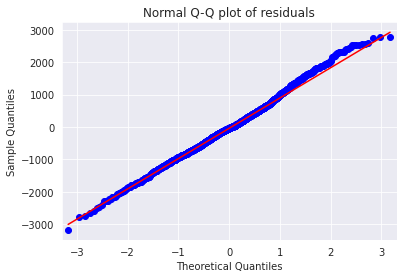

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(final_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

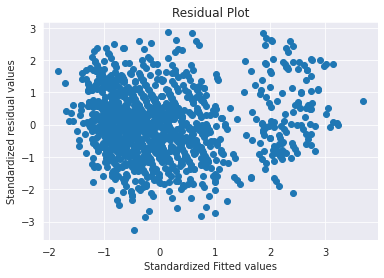

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

No pattern in error

In [ ]:
final_model.rsquared,final_model.rsquared_adj

(0.9003762532318559, 0.8997729300114583)

In [ ]:
# test data for prediction is
test_data=pd.DataFrame({'age':12,"km":40000,"hp":80,"cc":1300,"doors":4,"gears":5,"qtr_tax":69,"weight":1012},index=[0])
test_data

,age,km,hp,cc,doors,gears,qtr_tax,weight
0,12,40000,80,1300,4,5,69,1012


In [ ]:
# MPrediction of Price
final_model.predict(test_data)

0    14398.815471
dtype: float64

In [ ]:
predicted_values = model.predict(toyotocorolla_1)
toyotocorolla_1["predicted_price"] = pd.Series(predicted_values)
toyotocorolla_1["error"]=toyotocorolla_1["price"]-toyotocorolla_1["predicted_price"]
toyotocorolla_1

,price,age,km,hp,cc,doors,gears,qtr_tax,weight,predicted_price,error
0,13500,23,46986,90,2000,3,5,210,1165,15729.432375,-2229.432375
1,13750,23,72937,90,2000,3,5,210,1165,15329.991147,-1579.991147
2,13950,24,41711,90,2000,3,5,210,1165,15702.428929,-1752.428929
3,14950,26,48000,90,2000,3,5,210,1165,15389.233919,-439.233919
4,13750,30,38500,90,2000,3,5,210,1170,15287.734792,-1537.734792
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,9203.051136,-1703.051136
1432,10845,72,19000,86,1300,3,5,69,1015,8532.098968,2312.901032
1433,8500,71,17016,86,1300,3,5,69,1015,8670.833903,-170.833903
1434,7250,70,16916,86,1300,3,5,69,1015,8780.570061,-1530.570061


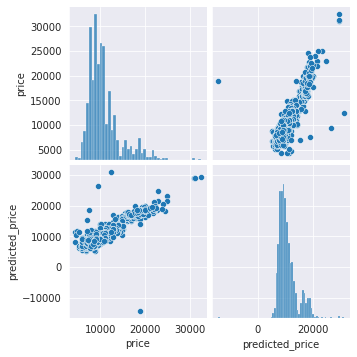

In [ ]:
sns.pairplot(toyotocorolla_1[['price','predicted_price']])

#conclusion

In [ ]:
# comparing above models
test_data={'Model':pd.Series(['all linearModel Transformation','price~age','price~km',
                              'price~hp','price~weight','price~age+km+weight+hp+doors+gears','After Removing influceing points']),
     'R Squared':pd.Series([toyotocorolla_1_model1.rsquared,toyotocorolla_1_model2.rsquared,toyotocorolla_1_model3.rsquared,
toyotocorolla_1_model4.rsquared,toyotocorolla_1_model5.rsquared,toyotocorolla_1_model6.rsquared,final_model.rsquared]),
     'adjR Squared':pd.Series([toyotocorolla_1_model1.rsquared_adj,toyotocorolla_1_model2.rsquared_adj,toyotocorolla_1_model3.rsquared_adj,
                            toyotocorolla_1_model4.rsquared_adj,toyotocorolla_1_model5.rsquared_adj,toyotocorolla_1_model6.rsquared_adj,final_model.rsquared_adj])}
     
test_table=pd.DataFrame(test_data)
test_table

,Model,R Squared,adjR Squared
0,all linearModel Transformation,0.862520,0.861749
1,price~age,0.767855,0.767693
2,price~km,0.324239,0.323767
3,price~hp,0.098680,0.098051
4,price~weight,0.331626,0.331159
5,price~age+km+weight+hp+doors+gears,0.860551,0.860161
6,After Removing influceing points,0.900376,0.899773


The Final model giving best accuracy among all for predicting profit. i,e.**90%**



---

                                                                  THANK YOU



---



